Лабораторная работа 2 (Задача кластеризация)

Цель: научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

Дано: excel-файл

Результат: число кластеров, обученная модель

Ход выполнения:

Загрузить данные из файла (использовать библиотеку Pandas).

Визуализировать загруженные данные (диаграмма рассеяния).

Оценить число групп (кластеров).

Выбрать модель кластеризации.

Обучить модель кластеризации на обучающих данных.

Проверить качество полученной модели на тестовых данных.

Визуализировать результат.

В первую очередь считаем данные из Excel-файла для дальнейшего анализа.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

file_path = 'lab2-02.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

Посмотрим на данные, чтобы предположить количество кластеров.

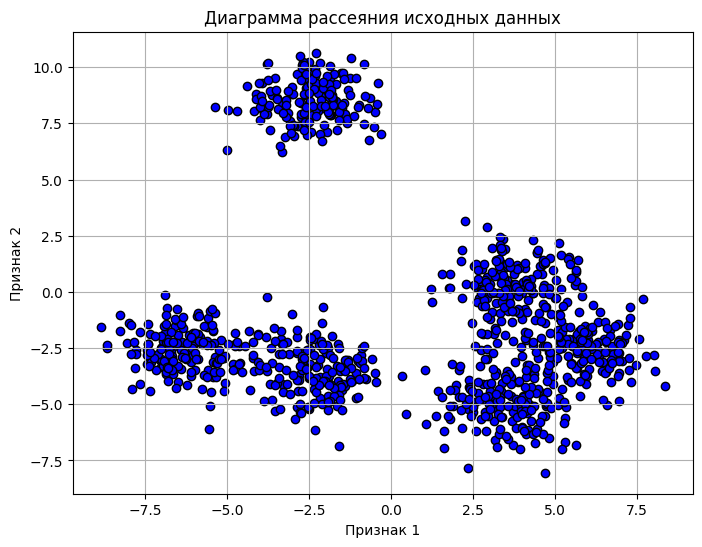

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.figure(figsize=(8, 6))
plt.scatter(data[0], data[1], c='blue', marker='o', edgecolor='k')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Диаграмма рассеяния исходных данных')
plt.grid(True)
plt.show()

А теперь найдем количество кластеров с помощью алгоритма KMeans, котороый есть в библиотеке scikit-learn.

Вычислим инерцию для разных чисел кластеров. Инерция нужна в алгоритме KMeans для оценки качества кластеризации. на показывает, насколько близко точки внутри каждого кластера расположены к его центру.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data, model.labels_))


Далее строим график с помщью метода локтя. Этот график показывает, как инерция уменьшается с увеличением числа кластеров. Оптимальное количество кластеров — это точка излома.

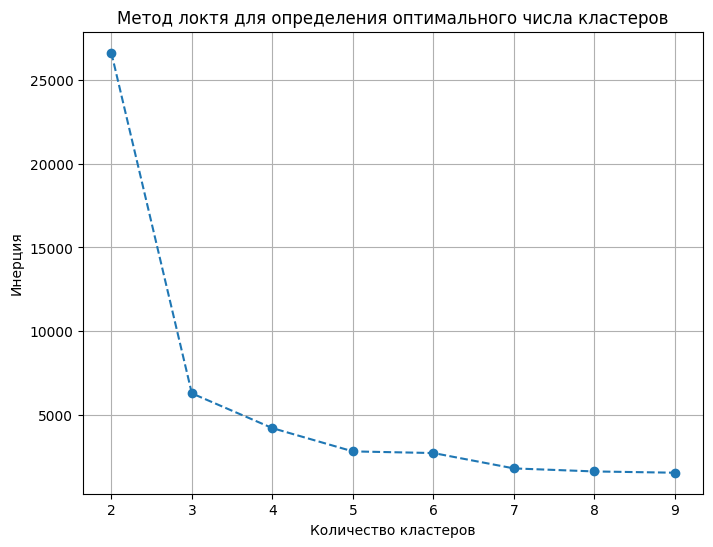

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

И строим график силуэта, который будет указывать на оптимальное количество решений.

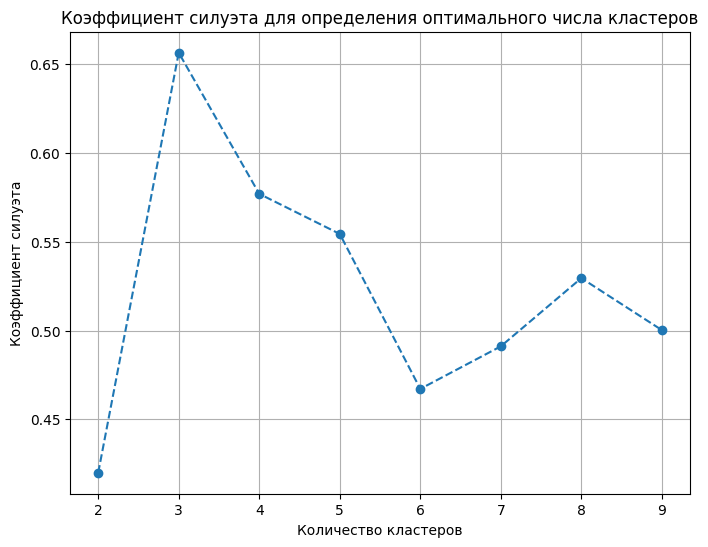

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Коэффициент силуэта для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

Далее обучаем модель KMeans с выбранными числами кластеров.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

data['Cluster'] = kmeans.labels_

И в финале, показываем результаты кластеризации на диаграмме.

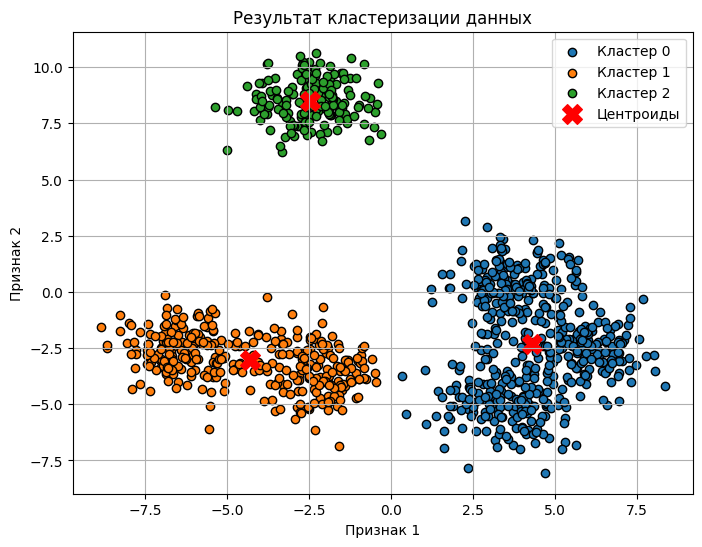

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data[0], clustered_data[1], label=f'Кластер {cluster}', edgecolor='k')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Результат кластеризации данных')
plt.legend()
plt.grid(True)
plt.show()

Ниже приведен код в полном формате

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

file_path = 'lab2-02.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

plt.figure(figsize=(8, 6))
plt.scatter(data[0], data[1], c='blue', marker='o', edgecolor='k')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Диаграмма рассеяния исходных данных')
plt.grid(True)
plt.show()

inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data, model.labels_))

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Коэффициент силуэта для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data[0], clustered_data[1], label=f'Кластер {cluster}', edgecolor='k')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Результат кластеризации данных')
plt.legend()
plt.grid(True)
plt.show()